### Import Liabraries

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

### Import data

In [387]:
data=pd.read_csv(r"C:\Users\m\Desktop\ML code\Final project\heart_failure_clinical_records_dataset.csv")

### Data Preprocessing 

In [388]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [390]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [391]:
data.shape

(299, 13)

<Axes: >

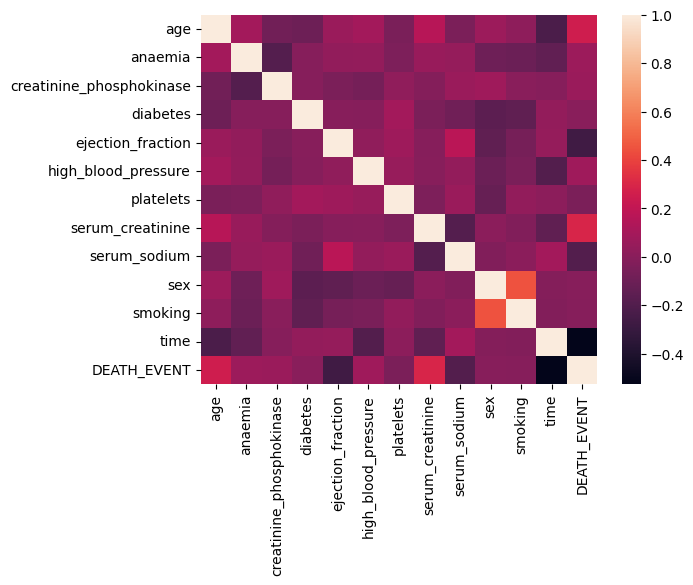

In [392]:
import seaborn as sns
corr=data.corr()
sns.heatmap(corr)

In [393]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [394]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [395]:
data.duplicated().sum()

0

### Removing Outlayers

In [396]:
# drop outliers using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
# shape before dropping outliers
print("Shape before dropping outliers:", data.shape)
df = data[(z_scores < 3).all(axis=1)]
# shape after dropping outliers
print("Shape after dropping outliers:", df.shape)

Shape before dropping outliers: (299, 13)
Shape after dropping outliers: (280, 13)


### Splitting Data

In [397]:
x=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(266, 12)
(266,)
(14, 12)
(14,)


In [398]:
print(np.bincount(y))

[194  86]


### Standard Normalization

In [399]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Applying PCA

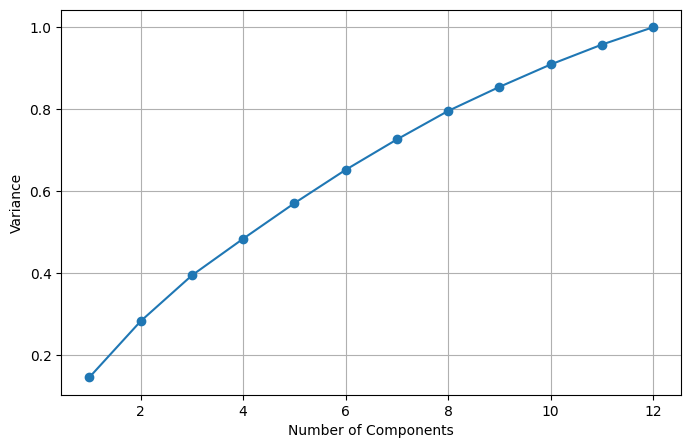

In [400]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(variance) + 1), variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.grid()
plt.show()


In [401]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

print(x_train_pca.shape)
print(x_test_pca.shape)

(266, 3)
(14, 3)


# MODEL

# Using Logistic regression

Accuracy: 0.86


<Axes: >

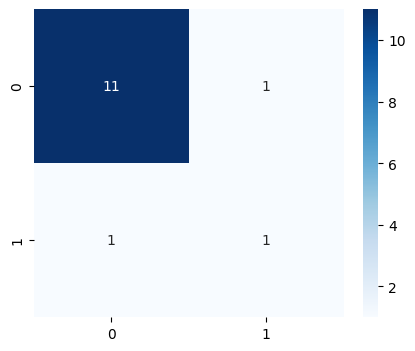

In [402]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model_LR=LR=LogisticRegression(max_iter=1000,solver='lbfgs')
LR.fit(x_train,y_train)

y_pred = model_LR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])

# Using MLP

### Without PCA

In [414]:
from tensorflow.keras import layers
import keras
model=keras.Sequential([
    layers.Dense(64, activation='relu',input_shape=(12,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

model.compile(
    loss='binary_crossentropy', 
    optimizer='adam',
    metrics=['accuracy'])
    

model.fit(x_train,y_train,epochs=50, batch_size=32,callbacks=[early_stop],validation_data=(x_test,y_test))


Epoch 1/50
9/9 [==============================] - 1s 26ms/step - loss: 0.6874 - accuracy: 0.5338 - val_loss: 0.6603 - val_accuracy: 0.5000
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6269 - accuracy: 0.6880 - val_loss: 0.5950 - val_accuracy: 0.7857
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.7669 - val_loss: 0.5651 - val_accuracy: 0.7857
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5474 - accuracy: 0.7707 - val_loss: 0.5387 - val_accuracy: 0.7857
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5164 - accuracy: 0.8083 - val_loss: 0.5177 - val_accuracy: 0.7857
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4871 - accuracy: 0.8158 - val_loss: 0.5006 - val_accuracy: 0.7857
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4602 - accuracy: 0.8120 - val_loss: 0.4855 - val_accuracy: 0.7143
Epoch 8/50
9/9 [=================

### With PCA

In [ ]:
# from tensorflow.keras import layers
# import keras
# model=keras.Sequential([
#     layers.Dense(128, activation='relu', input_shape=(3,)),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])
# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

# model.compile(
#     loss='binary_crossentropy', 
#     optimizer='adam',
#     metrics=['accuracy'])

# model.fit(x_train_pca,y_train,epochs=50,batch_size=32,callbacks=[early_stop],validation_data=(x_test_pca,y_test))

Epoch 1/50
9/9 [==============================] - 2s 25ms/step - loss: 0.6635 - accuracy: 0.7368 - val_loss: 0.6383 - val_accuracy: 0.7143
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5900 - accuracy: 0.7744 - val_loss: 0.5701 - val_accuracy: 0.6429
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.5190 - accuracy: 0.7857 - val_loss: 0.5251 - val_accuracy: 0.7143
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4750 - accuracy: 0.7970 - val_loss: 0.4998 - val_accuracy: 0.7143
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.4438 - accuracy: 0.8195 - val_loss: 0.5173 - val_accuracy: 0.7143
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4396 - accuracy: 0.8233 - val_loss: 0.5347 - val_accuracy: 0.7143
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.4322 - accuracy: 0.8346 - val_loss: 0.5010 - val_accuracy: 0.7143
Epoch 8/50
9/9 [=================

# Using AdaBoost

### Without PCA

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn import datasets
# from sklearn import metrics
# from sklearn.tree import DecisionTreeClassifier

# stump = DecisionTreeClassifier(max_depth=1,
#                                class_weight='balanced')

# Boost = AdaBoostClassifier(n_estimators=50,
#                            estimator=stump,
#                            learning_rate=1)

# model = Boost.fit(x_train, y_train)

# y_pred = model.predict(x_test)
# print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.50      0.50      0.50         2

    accuracy                           0.86        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.86      0.86      0.86        14



### With PCA

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn import datasets
# from sklearn import metrics

# Boost = AdaBoostClassifier(n_estimators=50, learning_rate=0.01)
# model = Boost.fit(x_train_pca, y_train)

# y_pred = model.predict(x_test_pca)
# print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.25      0.50      0.33         2

    accuracy                           0.71        14
   macro avg       0.57      0.62      0.58        14
weighted avg       0.81      0.71      0.75        14



In [417]:
import numpy as np
import gradio as gr

# دالة تحويل نعم/لا أو ذكر/أنثى إلى 0/1
def binary(val):
    return 1 if val in ["Yes", "Male"] else 0

# دالة التوقع
def predict(age, anaemia, cpk, diabetes, ef, hbp, platelets, serum_creatinine, ss, sex, smoking, time):
    # نحول كل المدخلات البوليانية إلى أرقام قبل بناء المصفوفة
    anaemia = binary(anaemia)
    diabetes = binary(diabetes)
    hbp = binary(hbp)
    sex = binary(sex)
    smoking = binary(smoking)

    x = np.array([[age, anaemia, cpk, diabetes, ef, hbp, platelets,
                   serum_creatinine, ss, sex, smoking, time]])

    x_scaled = scaler.transform(x)
    prob = model_LR.predict_proba(x_scaled)[0][1]
    pred = int(prob > 0.5)
    return f"Prediction: {'DEATH' if pred == 1 else 'SURVIVE'}\nProbability: {prob:.2f}"

# مداخل Gradio - نستخدم strings بدل أرقام
inputs = [
    gr.Slider(30, 100, value=60, label="Age"),
    gr.Radio(["No", "Yes"], label="Anaemia", value="No"),
    gr.Slider(20, 8000, value=250, label="Creatinine Phosphokinase"),
    gr.Radio(["No", "Yes"], label="Diabetes", value="No"),
    gr.Slider(10, 80, value=40, label="Ejection Fraction"),
    gr.Radio(["No", "Yes"], label="High Blood Pressure", value="No"),
    gr.Slider(25000, 850000, value=250000, label="Platelets"),
    gr.Slider(0.1, 10.0, value=1.0, label="Serum Creatinine"),
    gr.Slider(110, 150, value=135, label="Serum Sodium"),
    gr.Radio(["Female", "Male"], label="Sex", value="Male"),
    gr.Radio(["No", "Yes"], label="Smoking", value="No"),
    gr.Slider(0, 300, value=100, label="Follow-up Time (days)"),
]

iface = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs="text",
    title="Heart Failure Risk Predictor",
    description="Enter patient data"
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7883
* To create a public link, set `share=True` in `launch()`.
